In [ ]:
df = pd.read_csv('/content/complete_2.csv', index_col=None, header=0)

<ipython-input-62-8fd326db939b>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/complete.csv', index_col=None, header=0)


In [ ]:
'''
#한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n#한글 폰트\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
#한글 깨짐 해결
import matplotlib as mpl
#mpl.rc("font", family='Malgun Gothic')
plt.rc('font', family='NanumBarunGothic')
# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

#### 보증금변동률 column 생성

##### 보증금변동률(2020.06기준)

In [ ]:
# 2020년 6월 데이터 저장
df_1 = df[df['계약년월']== 2020.06]

In [ ]:
# '건물명' '본번' '부번' '임대면적'을 기준으로 그룹화하여 같은 건물별 마지막 날짜에 거래된 데이터를 수집
latest_values = df_1.groupby(['건물명','본번','부번','임대면적']).apply(lambda x: x.sort_values('계약년월').iloc[-1][['계약일', '보증금(만원)']])

In [ ]:
# 수집된 데이터를 원본 데이터와 merge
df_merged = df.merge(latest_values, on=['건물명','본번','부번','임대면적'], how='left')

In [ ]:
df_merged['보증금(만원)_y'].isna().sum()

436493

In [ ]:
# 중복된 컬럼들은 _x,_y로 구분되기 때문에 다시 컬럼명을 바꿔줌
new_columns = {'보증금(만원)_x': '보증금(만원)', '보증금(만원)_y': '기준보증금(만원)', '계약일_x' : '계약일', '계약일_y' : '기준계약일'}
df_merged = df_merged.rename(columns=new_columns)

In [ ]:
# 보증금 변동률 컬럼 생성
df_merged['보증금변동률(2020.06기준)'] = round((df_merged['기준보증금(만원)'] - df_merged['보증금(만원)'])/ df_merged['기준보증금(만원)'] * 100 ,2)

In [ ]:
# 필요없는 컬럼 삭제
df_merged = df_merged.drop(['기준보증금(만원)','기준계약일'] , axis = 1)
df = df_merged

In [ ]:
df['보증금변동률(2020.06기준)'].isna().sum()

436493

##### 보증금변동률(2년기준)

In [ ]:
# 계약년월을 2022-01-01 형태로 각 연도, 월에 1일로 임시 지정
df['계약년월'] = df['계약년월'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305038 entries, 0 to 1305037
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   접수년도               1305038 non-null  int64         
 1   자치구명               1305038 non-null  object        
 2   법정동명               1305035 non-null  object        
 3   본번                 1304850 non-null  float64       
 4   부번                 1304850 non-null  float64       
 5   층                  1305028 non-null  float64       
 6   계약일                1305038 non-null  object        
 7   전월세구분              1305038 non-null  object        
 8   임대면적               1305028 non-null  float64       
 9   보증금(만원)            1305038 non-null  float64       
 10  건물명                1299402 non-null  object        
 11  건축년도               1299405 non-null  float64       
 12  건물용도               1305038 non-null  object        
 13  신규계약구분             178546 n

In [ ]:
df["계약년월"]

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1305033   2013-02-01
1305034   2013-03-01
1305035   2013-03-01
1305036   2013-09-01
1305037   2013-11-01
Name: 계약년월, Length: 1305038, dtype: datetime64[ns]

In [ ]:
# 계약년월의 2년전 일자 컬럼 생성
df["계약년월_2년전"] = df['계약년월'] - pd.DateOffset(years=2)
df['계약년월_2년전']

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
1305033   2011-02-01
1305034   2011-03-01
1305035   2011-03-01
1305036   2011-09-01
1305037   2011-11-01
Name: 계약년월_2년전, Length: 1305038, dtype: datetime64[ns]

In [ ]:
# '건물명' '본번' '부번' '임대면적'을 기준으로 그룹화하여 같은 건물별 마지막 날짜에 거래된 데이터를 수집
latest_values = df.groupby(['건물명','본번','부번','임대면적']).apply(lambda x: x.sort_values('계약년월').iloc[-1][['계약일', '보증금(만원)']])

In [ ]:
latest_values

계약일  보증금(만원)
건물명       본번   부번  임대면적                     
\t(1)\t   1.0  0.0 21.0  2022-03-30  15000.0
                   22.0  2020-08-10   5000.0
\t(1-1)\t 1.0  1.0 31.0  2019-02-11  17000.0
                   34.0  2022-04-06  21000.0
                   41.0  2020-02-05  22000.0
...                             ...      ...
힘멜하임      43.0 6.0 24.0  2020-12-04  17502.0
                   28.0  2019-10-29  17000.0
                   30.0  2018-11-11  19000.0
                   48.0  2018-11-14  26000.0
                   55.0  2019-11-03  29000.0

[36429 rows x 2 columns]

In [ ]:
# 수집된 데이터를 원본 데이터와 merge
df_merged = df.merge(latest_values, on=['건물명','본번','부번','임대면적'], how='left')
df_merged

,접수년도,자치구명,법정동명,본번,부번,층,계약일_x,전월세구분,임대면적,보증금(만원)_x,...,계약기간(개월),계약년월,계약년도,계약월,신축여부,면적구분,보증금변동률(2020.06기준),계약년월_2년전,계약일_y,보증금(만원)_y
0,2022,영등포구,양평동2가,1.0,3.0,3.0,2022-01-01,전세,19.0,16000.0,...,24.0,2022-01-01,2022,1,준신축,59㎡ 미만,-1.27,2020-01-01,2022-11-07,15000.0
1,2022,강남구,역삼동,825.0,20.0,3.0,2022-01-01,전세,25.0,29500.0,...,12.0,2022-01-01,2022,1,준신축,59㎡ 미만,-18.00,2020-01-01,2022-11-22,26000.0
2,2022,강동구,고덕동,693.0,0.0,2.0,2022-01-01,전세,60.0,36000.0,...,24.0,2022-01-01,2022,1,신축,59㎡ 이상 84㎡ 이하,44.62,2020-01-01,2022-12-27,50000.0
3,2022,용산구,이촌동,402.0,0.0,3.0,2022-01-01,전세,59.0,65000.0,...,24.0,2022-01-01,2022,1,구축,59㎡ 이상 84㎡ 이하,-20.37,2020-01-01,2022-12-28,55500.0
4,2022,관악구,봉천동,869.0,10.0,3.0,2022-01-01,전세,24.0,18000.0,...,24.0,2022-01-01,2022,1,구축,59㎡ 미만,NaN,2020-01-01,2022-08-26,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305033,2013,은평구,갈현동,327.0,15.0,2.0,2013-02-07,전세,69.0,16000.0,...,24.0,2013-02-01,2013,2,준신축,59㎡ 이상 84㎡ 이하,NaN,2011-02-01,2013-03-02,15000.0
1305034,2013,은평구,갈현동,327.0,15.0,1.0,2013-03-02,전세,69.0,15000.0,...,24.0,2013-03-01,2013,3,준신축,59㎡ 이상 84㎡ 이하,NaN,2011-03-01,2013-03-02,15000.0
1305035,2013,은평구,구산동,3.0,24.0,3.0,2013-03-26,전세,42.0,12500.0,...,24.0,2013-03-01,2013,3,신축,59㎡ 미만,NaN,2011-03-01,2021-03-10,15000.0
1305036,2013,용산구,후암동,244.0,91.0,3.0,2013-09-13,전세,82.0,27000.0,...,24.0,2013-09-01,2013,9,구축,59㎡ 이상 84㎡ 이하,NaN,2011-09-01,2021-04-14,45000.0


In [ ]:
# 컬럼명이 중복되어 변경된 컬럼명 다시 지정
new_columns = {'보증금(만원)_x': '보증금(만원)', '보증금(만원)_y': '기준보증금(만원)', '계약일_x' : '계약일', '계약일_y' : '기준계약일'}
df_merged = df_merged.rename(columns=new_columns)

In [ ]:
# 보증금변동률(2년기준) 컬럼 생성
df_merged['보증금변동률(2년기준)'] = round((df_merged['기준보증금(만원)'] - df_merged['보증금(만원)'])/ df_merged['기준보증금(만원)'] * 100 ,2)

In [ ]:
df_merged['보증금변동률(2년기준)']

0          -6.67
1         -13.46
2          28.00
3         -17.12
4         -20.00
           ...  
1305033    -6.67
1305034     0.00
1305035    16.67
1305036    40.00
1305037    24.00
Name: 보증금변동률(2년기준), Length: 1305038, dtype: float64

In [ ]:
df_merged['보증금변동률(2년기준)'].isna().sum()

5832

In [ ]:
df_merged.columns

Index(['접수년도', '자치구명', '법정동명', '본번', '부번', '층', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '건물명', '건축년도', '건물용도', '신규계약구분', '종전보증금', '종전임대료',
       '계약기간(개월)', '계약년월', '계약년도', '계약월', '신축여부', '면적구분', '보증금변동률(2020.06기준)',
       '계약년월_2년전', '기준계약일', '기준보증금(만원)', '보증금변동률(2년기준)'],
      dtype='object')

In [ ]:
# 필요없는 컬럼 제거
df = df_merged.drop(["계약년월_2년전", "기준계약일", "기준보증금(만원)"], axis = 1)

In [ ]:
df['보증금변동률(2년기준)'].describe()

count    1.299206e+06
mean     1.534815e+01
std      2.989757e+01
min     -2.800000e+03
25%      2.140000e+00
50%      1.651000e+01
75%      3.200000e+01
max      9.722000e+01
Name: 보증금변동률(2년기준), dtype: float64

#### 전세가율 column 생성

##### 매매가 column 추가

In [ ]:
actual = pd.read_csv('/content/drive/MyDrive/Team Project 2/매매가_전처리_1.csv', index_col=None, header=0, encoding='utf-8')

<ipython-input-87-a1f0453a42a5>:1: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  actual = pd.read_csv('/content/drive/MyDrive/Team Project 2/매매가_전처리_1.csv', index_col=None, header=0, encoding='utf-8')


In [ ]:
actual.isna().sum()

Unnamed: 0         0
자치구명               0
법정동명               0
본번               134
부번               134
건물명             3017
계약일                0
물건금액(만원)           0
건물면적(㎡)            0
토지면적(㎡)       515908
층                  0
취소일           947196
건축년도            3004
건물용도               0
신고구분          907827
dtype: int64

In [ ]:
actual['본번'] = pd.to_numeric(actual['본번'], errors='coerce')
actual = actual.rename(columns={'건물면적(㎡)': '임대면적','물건금액(만원)':'매매가(만원)'})
actual['계약년월'] = actual['계약일'].astype(str)  # '계약년월'을 문자열로 변환
actual['계약년월'] = actual['계약년월'].str[:6].astype(int)  # 뒤의 두 자리 숫자 잘라내기

In [ ]:
df['계약년월'] = df['계약년월'].dt.strftime('%Y%m').astype(int)

In [ ]:
df.head()

,접수년도,자치구명,법정동명,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),...,종전보증금,종전임대료,계약기간(개월),계약년월,계약년도,계약월,신축여부,면적구분,보증금변동률(2020.06기준),보증금변동률(2년기준)
0,2022,영등포구,양평동2가,1.0,3.0,3.0,2022-01-01,전세,19.0,16000.0,...,0.0,NaN,24.0,202201,2022,1,준신축,59㎡ 미만,-1.27,-6.67
1,2022,강남구,역삼동,825.0,20.0,3.0,2022-01-01,전세,25.0,29500.0,...,0.0,NaN,12.0,202201,2022,1,준신축,59㎡ 미만,-18.00,-13.46
2,2022,강동구,고덕동,693.0,0.0,2.0,2022-01-01,전세,60.0,36000.0,...,NaN,NaN,24.0,202201,2022,1,신축,59㎡ 이상 84㎡ 이하,44.62,28.00
3,2022,용산구,이촌동,402.0,0.0,3.0,2022-01-01,전세,59.0,65000.0,...,0.0,NaN,24.0,202201,2022,1,구축,59㎡ 이상 84㎡ 이하,-20.37,-17.12
4,2022,관악구,봉천동,869.0,10.0,3.0,2022-01-01,전세,24.0,18000.0,...,0.0,NaN,24.0,202201,2022,1,구축,59㎡ 미만,NaN,-20.00


In [ ]:
actual.shape

(955225, 16)

In [ ]:
# 본번, 부번, 건물명, 임대면적, 계약년월로 그룹화하여 '매매가(만원)'의 평균 계산
grouped_avg = actual.groupby(['본번', '부번', '건물명','층', '임대면적', '계약년월'])['매매가(만원)'].mean()

# 새로운 데이터프레임에 평균 매매가 저장
new_actual = pd.DataFrame(grouped_avg).reset_index()

In [ ]:
#df를 기준으로 매매가 컬럼 추가
df = df.merge(new_actual, on=['본번', '부번', '건물명', '층', '임대면적', '계약년월'], how='left')

##### 회귀분석을 이용해 df['매매가(만원)'] 결측치 처리

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 레이블 인코딩
label_encoder = LabelEncoder()
df['자치구명_encoded'] = label_encoder.fit_transform(df['자치구명'])
df['법정동명_encoded'] = label_encoder.fit_transform(df['법정동명'])
df['건물용도_encoded'] = label_encoder.fit_transform(df['건물용도'])
df['계약년월_encoded'] = label_encoder.fit_transform(df['계약년월'])
# Scaling
scaler = StandardScaler()
df['층_scaled'] = scaler.fit_transform(df['층'].values.reshape(-1, 1))
df['임대면적_scaled'] = scaler.fit_transform(df['임대면적'].values.reshape(-1, 1))
df['건축년도_scaled'] = scaler.fit_transform(df['건축년도'].values.reshape(-1, 1))

# 결측치를 채울 변수들을 선택하여 독립 변수로 설정
features = ['자치구명_encoded','법정동명_encoded', '건물용도_encoded', '계약년월_encoded', '층_scaled', '임대면적_scaled', '건축년도_scaled',]


# 결측치가 있는 데이터와 결측치가 없는 데이터 분리
data_with_missing = df[df['매매가(만원)'].isna()]
data_without_missing = df[df['매매가(만원)'].notna()]

# 결측치를 예측하기 위한 독립 변수 설정
X_missing = data_with_missing[features]

# 결측치가 있는 데이터를 위한 독립 변수와 종속 변수 설정
X_train = data_without_missing[features]
y_train = data_without_missing['매매가(만원)']

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,Features,VIF
0,자치구명_encoded,3.222843
1,법정동명_encoded,3.074009
2,건물용도_encoded,1.373685
3,계약년월_encoded,2.721010
4,층_scaled,1.239920
5,임대면적_scaled,1.212308
6,건축년도_scaled,1.087777


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
# HistGradientBoostingRegressor 모델 학습
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# 결측치 예측
predicted_prices = model.predict(X_missing)

# 예측한 결측치로 매매가 변수 채우기
df.loc[df['매매가(만원)'].isna(), '매매가(만원)'] = predicted_prices

In [ ]:
# 성능 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return adjusted_r2

# 실제값과 예측값 가져오기
y_true = data_without_missing['매매가(만원)']
y_pred = model.predict(X_train)

# 평균 제곱근 오차(RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)

# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_true, y_pred)

# 결정 계수(R^2)
r2 = r2_score(y_true, y_pred)

# 수정된 결정 계수(adjusted R^2)
n_features = len(features)
adjusted_r2 = adjusted_r2_score(y_true, y_pred, n_features)

# 결과 출력
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)

RMSE: 10496.391842317387
MAE: 6794.198834428032
R^2: 0.957040701779056
Adjusted R^2: 0.9570398101717007


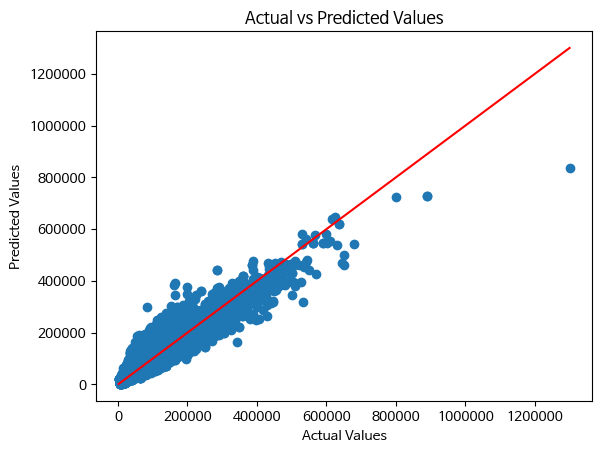

In [ ]:
# Create a scatter plot : actual vs predicted values
plt.scatter(y_true, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Add the 45-degree line
min_value = min(min(y_true), min(y_pred))
max_value = max(max(y_true), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red')

# Set the tick label format to plain
plt.ticklabel_format(style='plain')

plt.show();

##### 전세가율(%) = 전세가격 / 매매가격 x 100

In [ ]:
# 전세가율 컬럼 생성
df['전세가율'] = df['보증금(만원)'] / df['매매가(만원)'] * 100

In [ ]:
print(df['매매가(만원)'].isna().sum(), df['전세가율'].isna().sum())

0 0


In [ ]:
#매매가(만원), 전세가율 반올림
df['매매가(만원)'] = round(df['매매가(만원)'], 2)
df['전세가율'] = round(df['전세가율'], 2)

##### 전세가율 이상치 제거

In [ ]:
df.shape

(1305038, 33)

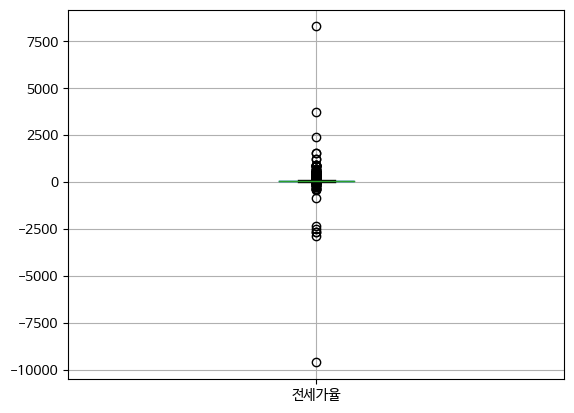

In [ ]:
box = df.boxplot(column= ['전세가율'])
box.plot()
plt.show();

- 전세가율 이상치 제거
  - 한국도시연구소 [2022년 상반기 실거래가 분석] 논문 기반
  - 전세가율이 10이하, 200이상인 레코드(5159개) 제거

In [ ]:
df = df.drop(df[df['전세가율'] >= 200].index)
df = df.drop(df[df['전세가율'] <= 10].index)
df.shape

(1300267, 33)

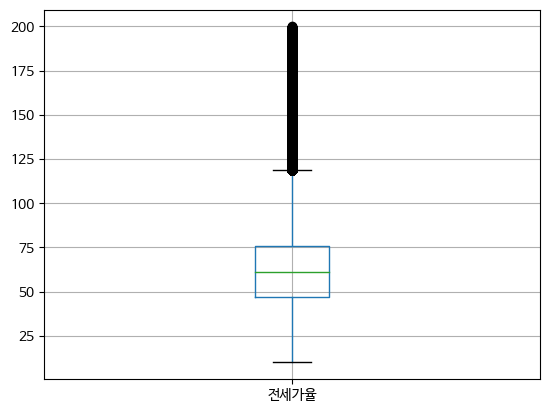

In [ ]:
box = df.boxplot(column= ['전세가율'])
box.plot()
plt.show();

In [ ]:
df = df.drop(['자치구명_encoded','법정동명_encoded', '건물용도_encoded', '계약년월_encoded', '층_scaled', '임대면적_scaled', '건축년도_scaled',], axis=1)

#### Target : 역전세 위험 유무 column 생성
- 전세가격 변동률을 구하셨는지 확인이 필요합니다.
- 주택시장이 전세가격에 대한 변화에 반응하는 방식, 그리고 그 변화가 일시적인 것인지 아니면 지속적인 변화인지에 대한 여러 가지 요인에 의해 영향을 받을 수 있습니다.
- 전세가격 변동률을 구하셨다면 가격 변동에서 n%가 하락한다면 역전세 위험이라는 컬럼을 생성해서 위험하다면 1 아니라면 0 으로 표기하는 방식을 추천드립니다.
- 위에 역전세 위험 이라는 이진 분류를 활용해서 비율로 정의 할 수 있습니다. 하지만 해당 방법은 각 시나리오에 대한 위험의 상대적인 크기가 고려되지 않으므로 위 시그널을 어떻게 활용해줄지 고민이 필요합니다. 해당 시그널을 잘 활용하신다면 위험률을 구하는 좋은 방법이 탄생할 수 있습니다.
---
- 보증금 변동률
참고 : 같은 건물 2년 기준으로, 세세하게 변동률 보고싶을 때는 3개월씩 평균내서 (없는거는 내삽으로 처리 - 그래프보고 모델 적용해서 처리)
- 전세가율(%) = 전세가격 / 매매가격 x 100
- 역전세 위험 유무 (타겟)
  - 여러 변수들을 활용하여 공식 만들기
  - 이진분류
  - % ..?

In [ ]:
df.head().T

,0,1,2,3,4
접수년도,2022,2022,2022,2022,2022
자치구명,영등포구,강남구,강동구,용산구,관악구
법정동명,양평동2가,역삼동,고덕동,이촌동,봉천동
본번,1.0,825.0,693.0,402.0,869.0
부번,3.0,20.0,0.0,0.0,10.0
층,3.0,3.0,2.0,3.0,3.0
계약일,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01
전월세구분,전세,전세,전세,전세,전세
임대면적,19.0,25.0,60.0,59.0,24.0
보증금(만원),16000.0,29500.0,36000.0,65000.0,18000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300267 entries, 0 to 1305037
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   접수년도               1300267 non-null  int64  
 1   자치구명               1300267 non-null  object 
 2   법정동명               1300264 non-null  object 
 3   본번                 1300081 non-null  float64
 4   부번                 1300081 non-null  float64
 5   층                  1300257 non-null  float64
 6   계약일                1300267 non-null  object 
 7   전월세구분              1300267 non-null  object 
 8   임대면적               1300257 non-null  float64
 9   보증금(만원)            1300267 non-null  float64
 10  건물명                1294743 non-null  object 
 11  건축년도               1294746 non-null  float64
 12  건물용도               1300267 non-null  object 
 13  신규계약구분             177866 non-null   object 
 14  종전보증금              150725 non-null   float64
 15  종전임대료              198 non-null 

In [ ]:
df['보증금변동률(2년기준)'].describe()

count    1.294549e+06
mean     1.530436e+01
std      2.980967e+01
min     -2.800000e+03
25%      2.170000e+00
50%      1.654000e+01
75%      3.197000e+01
max      9.474000e+01
Name: 보증금변동률(2년기준), dtype: float64

In [ ]:
df['전세가율'].describe()

count    1.300267e+06
mean     6.257848e+01
std      2.265610e+01
min      1.001000e+01
25%      4.721000e+01
50%      6.125000e+01
75%      7.582000e+01
max      1.999100e+02
Name: 전세가율, dtype: float64

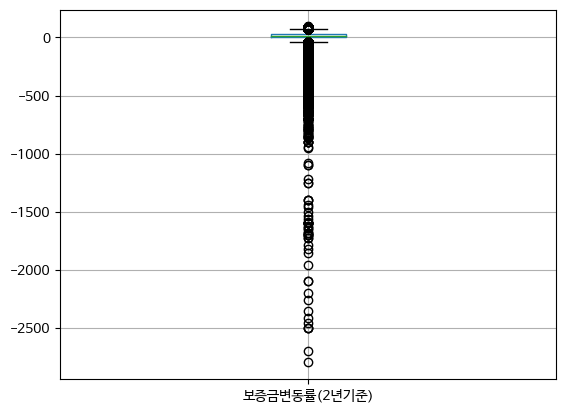

In [ ]:
box = df.boxplot(column= ['보증금변동률(2년기준)'])
box.plot()
plt.show();

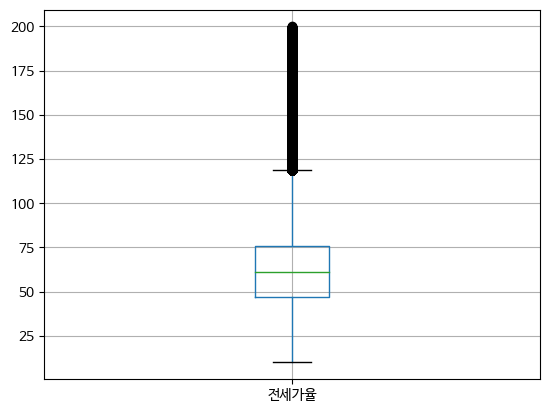

In [ ]:
box = df.boxplot(column= ['전세가율'])
box.plot()
plt.show();

In [ ]:
df['보증금변동률(2년기준)'].isna().sum()

5718

In [ ]:
#'보증금변동률(2년기준)'이 결측치인 레코드 -> 예측할 수 없으므로 drop
df = df.dropna(subset=['보증금변동률(2년기준)'])
df.shape

(1294549, 26)

In [ ]:
df = df.reset_index(drop=True)
df

,접수년도,자치구명,법정동명,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),...,계약기간(개월),계약년월,계약년도,계약월,신축여부,면적구분,보증금변동률(2020.06기준),보증금변동률(2년기준),매매가(만원),전세가율
0,2022,영등포구,양평동2가,1.0,3.0,3.0,2022-01-01,전세,19.0,16000.0,...,24.0,202201,2022,1,준신축,59㎡ 미만,-1.27,-6.67,14442.57,110.78
1,2022,강남구,역삼동,825.0,20.0,3.0,2022-01-01,전세,25.0,29500.0,...,12.0,202201,2022,1,준신축,59㎡ 미만,-18.00,-13.46,30333.33,97.25
2,2022,강동구,고덕동,693.0,0.0,2.0,2022-01-01,전세,60.0,36000.0,...,24.0,202201,2022,1,신축,59㎡ 이상 84㎡ 이하,44.62,28.00,142079.40,25.34
3,2022,용산구,이촌동,402.0,0.0,3.0,2022-01-01,전세,59.0,65000.0,...,24.0,202201,2022,1,구축,59㎡ 이상 84㎡ 이하,-20.37,-17.12,143007.52,45.45
4,2022,관악구,봉천동,869.0,10.0,3.0,2022-01-01,전세,24.0,18000.0,...,24.0,202201,2022,1,구축,59㎡ 미만,NaN,-20.00,15694.07,114.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294544,2013,은평구,갈현동,327.0,15.0,2.0,2013-02-07,전세,69.0,16000.0,...,24.0,201302,2013,2,준신축,59㎡ 이상 84㎡ 이하,NaN,-6.67,35510.92,45.06
1294545,2013,은평구,갈현동,327.0,15.0,1.0,2013-03-02,전세,69.0,15000.0,...,24.0,201303,2013,3,준신축,59㎡ 이상 84㎡ 이하,NaN,0.00,35537.27,42.21
1294546,2013,은평구,구산동,3.0,24.0,3.0,2013-03-26,전세,42.0,12500.0,...,24.0,201303,2013,3,신축,59㎡ 미만,NaN,16.67,18870.20,66.24
1294547,2013,용산구,후암동,244.0,91.0,3.0,2013-09-13,전세,82.0,27000.0,...,24.0,201309,2013,9,구축,59㎡ 이상 84㎡ 이하,NaN,40.00,51772.38,52.15


- 100% - 전세가율 = 갭차이
- 변동률 하락폭 >= 갭차이 : 역전세
- 하락한 폭이 갭차이보다 큰것을 입증할 수 있어야
  - 갭 = (매매가-전세가) / 매매가

In [ ]:
df['역전세위험'] = df.apply(lambda row: 1 if (row['보증금변동률(2년기준)'])*(-1) >= (100 - row['전세가율']) else 0, axis=1)

In [ ]:
# 전체의 5.8% 정도가 '역전세위험이 있다'로 분류
df['역전세위험'].value_counts()

0    1218782
1      75767
Name: 역전세위험, dtype: int64

### 데이터 확인 & 저장

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1294539,1294540,1294541,1294542,1294543,1294544,1294545,1294546,1294547,1294548
접수년도,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
자치구명,영등포구,강남구,강동구,용산구,관악구,관악구,강동구,동작구,성북구,동작구,...,강동구,강동구,강동구,강동구,강동구,은평구,은평구,은평구,용산구,서초구
법정동명,양평동2가,역삼동,고덕동,이촌동,봉천동,봉천동,고덕동,동작동,돈암동,동작동,...,천호동,천호동,천호동,천호동,천호동,갈현동,갈현동,구산동,후암동,양재동
본번,1.0,825.0,693.0,402.0,869.0,1712.0,693.0,102.0,636.0,102.0,...,449.0,449.0,449.0,449.0,449.0,327.0,327.0,3.0,244.0,378.0
부번,3.0,20.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,49.0,49.0,49.0,49.0,49.0,15.0,15.0,24.0,91.0,1.0
층,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0
계약일,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,...,2013-05-13,2013-06-27,2013-07-06,2013-07-13,2013-08-31,2013-02-07,2013-03-02,2013-03-26,2013-09-13,2013-11-04
전월세구분,전세,전세,전세,전세,전세,전세,전세,전세,전세,전세,...,전세,전세,전세,전세,전세,전세,전세,전세,전세,전세
임대면적,19.0,25.0,60.0,59.0,24.0,60.0,74.0,60.0,60.0,60.0,...,20.0,20.0,20.0,20.0,20.0,69.0,69.0,42.0,82.0,164.0
보증금(만원),16000.0,29500.0,36000.0,65000.0,18000.0,37800.0,85000.0,94000.0,53000.0,94000.0,...,5000.0,4000.0,6000.0,5500.0,5000.0,16000.0,15000.0,12500.0,27000.0,57000.0


In [ ]:
df.shape

(1294549, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294549 entries, 0 to 1294548
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   접수년도               1294549 non-null  int64  
 1   자치구명               1294549 non-null  object 
 2   법정동명               1294549 non-null  object 
 3   본번                 1294549 non-null  float64
 4   부번                 1294549 non-null  float64
 5   층                  1294549 non-null  float64
 6   계약일                1294549 non-null  object 
 7   전월세구분              1294549 non-null  object 
 8   임대면적               1294549 non-null  float64
 9   보증금(만원)            1294549 non-null  float64
 10  건물명                1294549 non-null  object 
 11  건축년도               1294549 non-null  float64
 12  건물용도               1294549 non-null  object 
 13  신규계약구분             176990 non-null   object 
 14  종전보증금              150026 non-null   float64
 15  종전임대료              197 non-null 

In [ ]:
df.to_csv('final_1.csv',index=False)